## Imports

In [1]:
import os
import time

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets
from torchvision import transforms, models

import matplotlib.pyplot as plt
from PIL import Image


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Model Settings

In [3]:
##########################
### SETTINGS
##########################

# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 128
NUM_EPOCHS = 10

# Architecture
#NUM_FEATURES = 28*28
#NUM_CLASSES = 10

# Other
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#GRAYSCALE = True

### CIFAR10 Dataset

In [5]:
##########################
### MNIST DATASET
##########################
root_dir = '/content/drive/My Drive/RND_SEM8'

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.CIFAR10(root= root_dir, train=True, transform = transforms.ToTensor(), download = True)

test_dataset = datasets.CIFAR10(root=root_dir,
                              train=False,
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

100%|██████████| 170498071/170498071 [00:03<00:00, 46867286.47it/s]


Extracting /content/drive/My Drive/RND_SEM8/cifar-10-python.tar.gz to /content/drive/My Drive/RND_SEM8
Image batch dimensions: torch.Size([128, 3, 32, 32])
Image label dimensions: torch.Size([128])


The following code cell that implements the ResNet-34 architecture is a derivative of the code provided at https://pytorch.org/docs/0.4.0/_modules/torchvision/models/resnet.html.

In [6]:
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # CIFAR-10 has 10 classes

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

model.to(DEVICE)

num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print statistics at the end of each epoch
    print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, running_loss / len(train_loader)))

print('Finished Training')
torch.save(model.state_dict(), 'resnet18_cifar10.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/50], Loss: 1.3659
Epoch [2/50], Loss: 0.9841
Epoch [3/50], Loss: 0.8129
Epoch [4/50], Loss: 0.6855
Epoch [5/50], Loss: 0.5871
Epoch [6/50], Loss: 0.4981
Epoch [7/50], Loss: 0.4209
Epoch [8/50], Loss: 0.3443
Epoch [9/50], Loss: 0.2877
Epoch [10/50], Loss: 0.2329
Epoch [11/50], Loss: 0.1917
Epoch [12/50], Loss: 0.1619
Epoch [13/50], Loss: 0.1350
Epoch [14/50], Loss: 0.1245
Epoch [15/50], Loss: 0.1087
Epoch [16/50], Loss: 0.1028
Epoch [17/50], Loss: 0.0869
Epoch [18/50], Loss: 0.0786
Epoch [19/50], Loss: 0.0759
Epoch [20/50], Loss: 0.0736
Epoch [21/50], Loss: 0.0719
Epoch [22/50], Loss: 0.0701
Epoch [23/50], Loss: 0.0573
Epoch [24/50], Loss: 0.0586
Epoch [25/50], Loss: 0.0590
Epoch [26/50], Loss: 0.0526
Epoch [27/50], Loss: 0.0553
Epoch [28/50], Loss: 0.0500
Epoch [29/50], Loss: 0.0467
Epoch [30/50], Loss: 0.0457
Epoch [31/50], Loss: 0.0510
Epoch [32/50], Loss: 0.0384
Epoch [33/50], Loss: 0.0411
Epoch [34/50], Loss: 0.0420
Epoch [35/50], Loss: 0.0431
Epoch [36/50], Loss: 0.0431
E

In [7]:
def compute_accuracy(model, dataloader, device):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


In [8]:
train_accuracy = compute_accuracy(model, train_loader, DEVICE)
print('Training Accuracy: %.2f%%' % train_accuracy)

test_accuracy = compute_accuracy(model, test_loader, DEVICE)
print('Test Accuracy: %.2f%%' % test_accuracy)


Training Accuracy: 99.47%
Test Accuracy: 77.26%


In [10]:
"""
torch.manual_seed(RANDOM_SEED)

model2 = models.resnet18(pretrained = False)
model2.to(DEVICE)
model2.load_state_dict(torch.load('/content/drive/MyDrive/RND_SEM8/mnist-logistic.pth', map_location=torch.device('cpu')))
model2.state_dict()

optimizer = torch.optim.Adam(model2.parameters(), lr=LEARNING_RATE)
"""

"\ntorch.manual_seed(RANDOM_SEED)\n\nmodel2 = models.resnet18(pretrained = False)\nmodel2.to(DEVICE)\nmodel2.load_state_dict(torch.load('/content/drive/MyDrive/RND_SEM8/mnist-logistic.pth', map_location=torch.device('cpu')))\nmodel2.state_dict()\n\noptimizer = torch.optim.Adam(model2.parameters(), lr=LEARNING_RATE)\n"

In [11]:
def calculate_softmax(predicted_labels):
    # Calculate e^x for each predicted label
    exp_values = np.exp(predicted_labels)

    # Calculate the sum of e^x values
    sum_exp_values = np.sum(exp_values)

    # Calculate softmax probabilities
    softmax_probs = exp_values / sum_exp_values

    return softmax_probs

def apply_dropout_to_image(model, image, num_dropout_iterations, prob=0.1):
    """
    Apply dropout to a single image multiple times and obtain predictions.

    Args:
    - model: The trained PyTorch model
    - image: The input image tensor
    - num_dropout_iterations: Number of times dropout should be applied
    - prob: Dropout probability

    Returns:
    - predictions: List of predicted labels for each dropout iteration
    """
    # Set the model to evaluation mode
    model.eval()

    # Define a dropout layer
    dropout = nn.Dropout(p=prob)  # Adjust the dropout probability as needed

    # Move the image tensor to the appropriate device
    image = image.to(DEVICE)

    # Create a list to store predictions
    predictions = []
    dropout_images = []


    # Apply dropout multiple times
    for _ in range(num_dropout_iterations):
        # Apply dropout to the input image
        image_with_dropout = dropout(image)
        # Forward pass through the model with dropout
        outputs= model(image_with_dropout)

        # Get predictions
        _, predicted_label = torch.max(outputs, 1)

        # Append predicted label to the predictions list
        predictions.append(predicted_label.item())
        dropout_images.append(image_with_dropout.detach().cpu().numpy())

    probabilities = calculate_softmax(predictions)

    return predictions,dropout_images, probabilities

# Example usage:
# predictions = apply_dropout_to_image(model2, test_image, num_dropout_iterations=30)


Original Image:


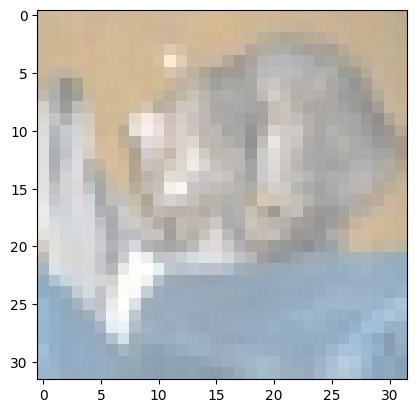

Dropout-Applied Images:
Image 1:


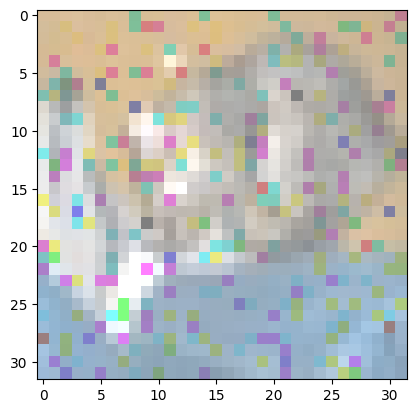

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test images
images, labels = next(iter(test_loader))

# Select one image from the batch
image = images[0].unsqueeze(0)

# Apply dropout to the selected image
predictions, dropout_images, probabilities = apply_dropout_to_image(model, image, num_dropout_iterations=1)

# Show original image
print('Original Image:')
imshow(torchvision.utils.make_grid(image))

# Show dropout-applied images
print('Dropout-Applied Images:')
for i, dropout_image in enumerate(dropout_images):
    print(f'Image {i+1}:')
    imshow(torchvision.utils.make_grid(torch.tensor(dropout_image)))  # Convert numpy array back to tensor for visualization


In [13]:
# Choose an index for the image
image_index = 8  # Choose the index of the image you want to visualize

# Get the image and its corresponding label from the test dataset
image, label = test_dataset[image_index]

# Apply dropout once to the image and obtain predictions
predictions,dropout_images, probabilities = apply_dropout_to_image(model, image.unsqueeze(0), num_dropout_iterations=30,prob =0.7)

print("Predictions:", predictions)
print("probabilities:", probabilities)

Predictions: [9, 1, 9, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 9, 6, 1, 1, 1, 1, 1, 9, 2, 1, 1, 1, 9, 1, 2, 9]
probabilities: [1.24100510e-01 4.16310832e-05 1.24100510e-01 4.16310832e-05
 4.16310832e-05 4.16310832e-05 4.16310832e-05 4.16310832e-05
 4.16310832e-05 4.16310832e-05 1.24100510e-01 4.16310832e-05
 4.16310832e-05 1.24100510e-01 1.24100510e-01 6.17860057e-03
 4.16310832e-05 4.16310832e-05 4.16310832e-05 4.16310832e-05
 4.16310832e-05 1.24100510e-01 1.13165017e-04 4.16310832e-05
 4.16310832e-05 4.16310832e-05 1.24100510e-01 4.16310832e-05
 1.13165017e-04 1.24100510e-01]


Predictions: [7]
probabilities: [1.]
Original Image:


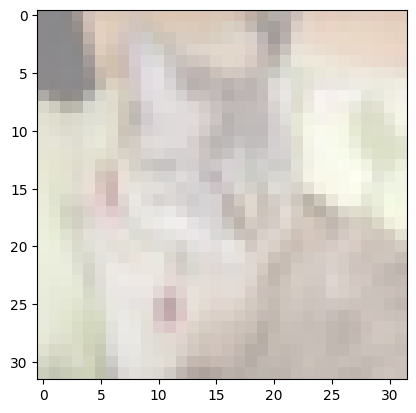

Dropout-Applied Images:
Image 1:


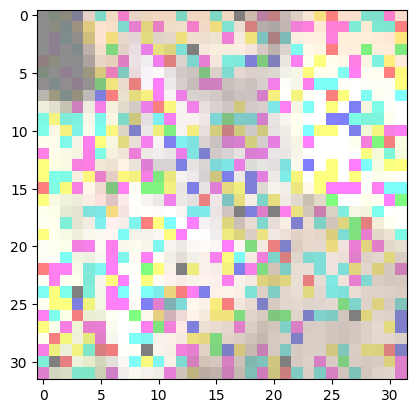

Predicted Label: 7


In [14]:
# Choose an index for the image
image_index = 8  # Choose the index of the image you want to visualize

# Get the image and its corresponding label from the test dataset
image, label = test_dataset[image_index]

# Apply dropout once to the image and obtain predictions
predictions,dropout_images, probabilities = apply_dropout_to_image(model, image.unsqueeze(0), num_dropout_iterations=1,prob =0.2)

print("Predictions:", predictions)
print("probabilities:", probabilities)
# Convert the image tensor to a numpy array for visualization
image_np = image.squeeze().numpy()

# Convert the dropout-affected image tensor to a numpy array for visualization
dropout_image_np = dropout_images[0].squeeze()

# Get the predicted label
predicted_label = predictions[0]

class_labels = [str(i) for i in range(10)]

# Show original image
print('Original Image:')
imshow(torchvision.utils.make_grid(image))

# Show dropout-applied images
print('Dropout-Applied Images:')
for i, dropout_image in enumerate(dropout_images):
    print(f'Image {i+1}:')
    imshow(torchvision.utils.make_grid(torch.tensor(dropout_image)))


# Print the predicted label
print('Predicted Label:', predicted_label)


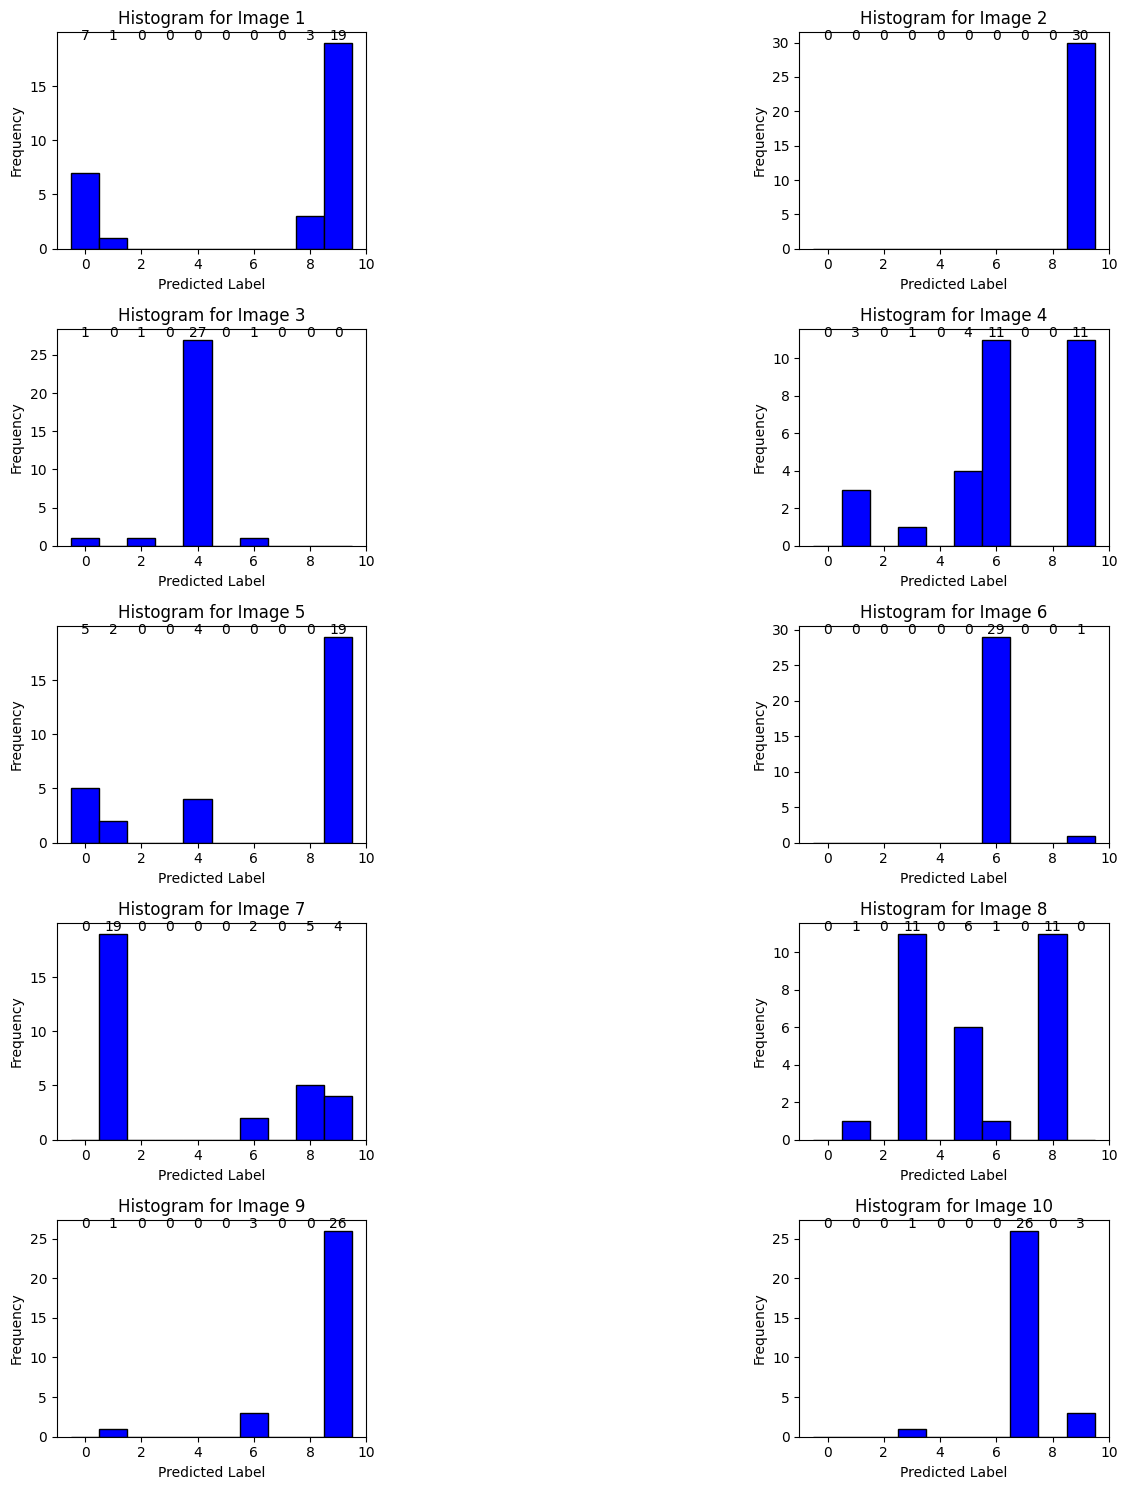

In [15]:
# Set the number of dropout iterations
num_dropout_iterations = 30

# Choose 10 random indices for the images
image_indices = [3, 11, 22, 33, 44, 55, 66, 77, 88, 99]  # You can change these indices as needed

# Create a figure to display the images and histograms
plt.figure(figsize=(15, 15))

# Iterate over the chosen image indices
for i, image_index in enumerate(image_indices, start=1):
    # Get the image and its corresponding label from the test dataset
    image, label = test_dataset[image_index]

    # Apply dropout multiple times to the image and obtain predictions
    predictions, _ ,_= apply_dropout_to_image(model, image.unsqueeze(0), num_dropout_iterations)

    # Show original image
    #print('Original Image:')
    #imshow(torchvision.utils.make_grid(image))


    # Plot the histogram for the predictions
    plt.subplot(5, 4, 2*i-1)
    plt.hist(predictions, bins=np.arange(11) - 0.5, color='blue', edgecolor='black')
    plt.title('Histogram for Image {}'.format(i))
    plt.xlabel('Predicted Label')
    plt.ylabel('Frequency')


    # Calculate the frequency of each predicted label
    label_counts = [predictions.count(j) for j in range(10)]

    # Add labels with counts on top of each bar in the histogram
    for k in range(10):
        plt.text(k, max(label_counts), str(label_counts[k]), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [21]:

# Set the number of dropout iterations
num_dropout_iterations = 30

# Dictionary to store image IDs and their corresponding entropy values
entropy_dict = {}

# Iterate through the test dataset
for image_index in range(len(test_dataset)):
    # Get the image and its corresponding label from the test dataset
    image, label = test_dataset[image_index]

    # Apply dropout multiple times to the image and obtain maximum probability values
    _, _, probabilities = apply_dropout_to_image(model, image.unsqueeze(0), num_dropout_iterations)

    # Calculate entropy using the maximum probability values
    probas = np.array(probabilities)
    entropy = -np.sum(probas * np.log2(probas + 1e-10))  # Calculate entropy
    entropy_dict[image_index] = entropy  # Store the image ID and its entropy in the dictionary

# Print the dictionary containing image IDs and their corresponding entropy values
print(entropy_dict)


{0: 1.934172543399185, 1: 2.0680315639115943, 2: 3.947267704910152, 3: 3.8139225559794294, 4: 4.878100803987288, 5: 4.906890591280434, 6: 4.66407682262218, 7: 4.906890591280434, 8: 3.9162093679317365, 9: 0.12516661262874296, 10: 3.0909322876368854, 11: 4.906890591280433, 12: 4.020103332506155, 13: 4.906890591280433, 14: 4.906890591280433, 15: 4.60215782845635, 16: 2.8299646198755615, 17: 4.243055082144749, 18: 1.879980044794801, 19: 4.906890591280434, 20: 4.773251974557917, 21: 4.018664517923005, 22: 1.617551085855799, 23: 4.906890591280433, 24: 4.3520906435876, 25: 2.509800285889433, 26: 4.226226431222571, 27: 3.9097629616228073, 28: 4.858343895298584, 29: 4.906890591280434, 30: 4.8678733816531805, 31: 3.395284896582565, 32: 3.23446885800529, 33: 3.994256621814902, 34: 4.906890591280433, 35: 4.767506991662355, 36: 4.744347188547753, 37: 4.80766603443362, 38: 4.858131186828493, 39: 2.92829697783998, 40: 4.219791632693427, 41: 4.906890591280434, 42: 2.6286158311058627, 43: 4.90689059128

In [26]:
# Convert the dictionary to a DataFrame
entropy_df = pd.DataFrame(list(entropy_dict.items()), columns=['Image_ID', 'Entropy'])

# Sort the DataFrame by entropy values in ascending order
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

# Print the sorted DataFrame
display(entropy_df)


,Image_ID,Entropy
2910,2910,4.906891
949,949,4.906891
4459,4459,4.906891
9611,9611,4.906891
2451,2451,4.906891
...,...,...
6864,6864,0.051457
3499,3499,0.051457
1875,1875,0.051457
1365,1365,0.051457


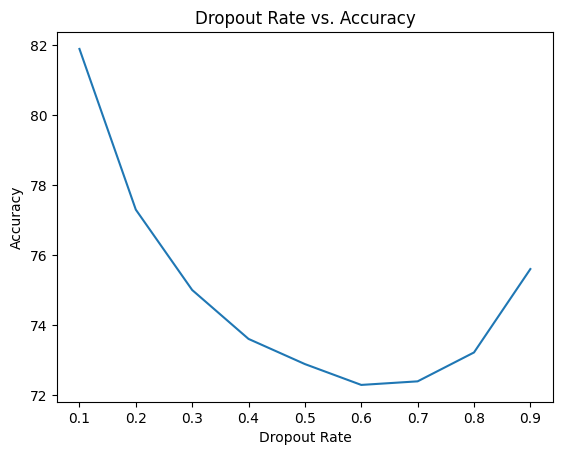

In [27]:
from torch.utils.data import DataLoader, Subset
# Initialize lists to store accuracy and dropout rate
accuracies = []
dropout_rates = []

# Define the dropout rates to iterate over
dropout_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# Loop through the dropout rates
for drop_rate in dropout_rate_range:
    # Calculate the number of images to drop
    num_images = len(entropy_df)
    num_drops = int(num_images * drop_rate)
    # Get the remaining rows after dropping the specified percentage
    entropy_df_remaining = entropy_df.iloc[:-num_drops]
    # Get the remaining image IDs
    remaining_image_ids = entropy_df_remaining['Image_ID'].tolist()

    # Create a new test dataset excluding the dropped image IDs
    new_test_dataset = Subset(test_dataset, [idx for idx in range(len(test_dataset)) if idx not in remaining_image_ids])

    # Create a data loader for the new test dataset
    new_test_loader = DataLoader(new_test_dataset, batch_size=128, shuffle=False)

    # Compute the accuracy of the model on the new test dataset
    accuracy = compute_accuracy(model, new_test_loader, DEVICE)

    # Append accuracy and dropout rate to the lists
    accuracies.append(accuracy)
    dropout_rates.append(drop_rate)

# Plot dropout rate vs. accuracy
plt.plot(dropout_rates, accuracies)
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Dropout Rate vs. Accuracy')
plt.show()


In [16]:
def add_gaussian_noise(image, mean=0, stddev=0.5):
    """
    Add Gaussian noise to an image.

    Args:
    - image (Tensor): Input image tensor.
    - mean (float): Mean of the Gaussian noise.
    - stddev (float): Standard deviation of the Gaussian noise.

    Returns:
    - noisy_image (Tensor): Image tensor with added Gaussian noise.
    """
    # Generate Gaussian noise
    noisy_image = image + torch.randn_like(image) * stddev + mean

    noisy_image = torch.clamp(noisy_image, 0, 1)

    return noisy_image


Original Image:


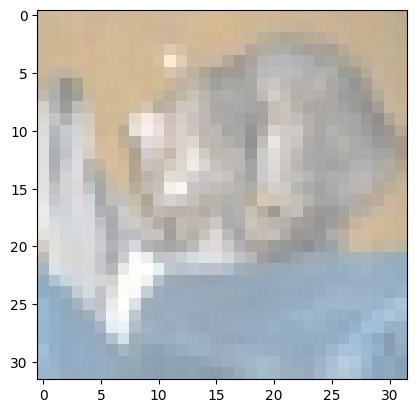

<ipython-input-17-c9873b3ee7b6>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  imshow(torchvision.utils.make_grid(torch.tensor(noisy_image)))


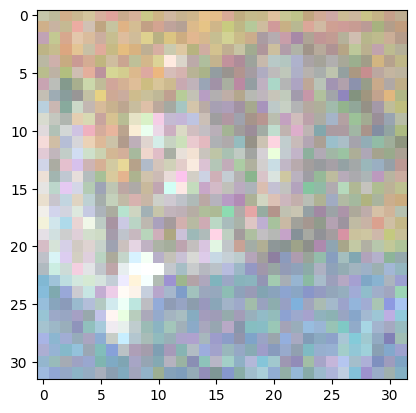

In [17]:
# Select one image from the test dataset
image, label = test_dataset[0]  # Change the index as needed

noisy_image = add_gaussian_noise(image, stddev= 0.1)

# Plot the original and noisy images
print('Original Image:')
imshow(torchvision.utils.make_grid(image))


imshow(torchvision.utils.make_grid(torch.tensor(noisy_image)))



In [18]:

# Add Gaussian noise to each image in the test dataset and calculate model accuracy
noisy_test_dataset = []

for image, label in test_dataset:
    # Add Gaussian noise to the image
    noisy_image = add_gaussian_noise(image)
    # Append the noisy image and label to the noisy test dataset
    noisy_test_dataset.append((noisy_image, label))

# Create a DataLoader for the noisy test dataset
noisy_test_loader = DataLoader(noisy_test_dataset, batch_size=128, shuffle=False)

# Calculate model accuracy on the noisy test dataset
accuracy = compute_accuracy(model, noisy_test_loader, DEVICE)
print("Model accuracy on noisy test dataset: {:.2f}%".format(accuracy))


Model accuracy on noisy test dataset: 17.74%


In [19]:
noise_levels = [0.0, 0.2, 0.4, 0.6, 0.8 ,1.0]

# Dictionary to store image IDs and their corresponding entropy values
entropy_dict = {}
# Iterate through the test dataset
for noise_level in noise_levels:
  predictions = []
  for image_index in range(len(test_dataset)):
      # Get the image and its corresponding label from the test dataset
      image, label = test_dataset[image_index]

      # Apply dropout multiple times to the image and obtain maximum probability values
      noisy_image = add_gaussian_noise(image, stddev =noise_level).to(DEVICE)
      # Forward pass through the model with dropout
      outputs= model(noisy_image.unsqueeze(0))

      # Get predictions
      _, predicted_label = torch.max(outputs, 1)

      # Append predicted label to the predictions list
      predictions.append(predicted_label.item())
  probabilities = calculate_softmax(predictions)

  # Calculate entropy using the maximum probability values
  probas = np.array(probabilities)
  entropy = -np.sum(probas * np.log2(probas + 1e-10))  # Calculate entropy
  entropy_dict[noise_level] = entropy  # Store the image ID and its entropy in the dictionary

# Print the dictionary containing image IDs and their corresponding entropy values
print(entropy_dict)


{0.0: 11.465897201987694, 0.2: 12.003216384288859, 0.4: 12.381590277238182, 0.6: 12.373168021723146, 0.8: 12.311941204422613, 1.0: 12.289475377598524}


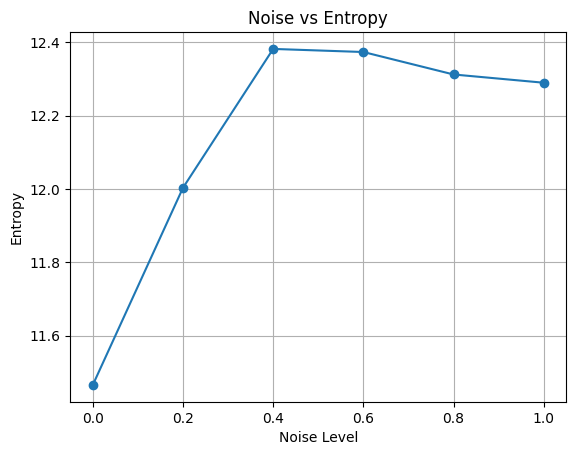

In [20]:

# Extract noise levels and entropy values from the entropy_dict
noise_levels = list(entropy_dict.keys())
entropies = list(entropy_dict.values())

# Plot noise vs entropy curve
plt.plot(noise_levels, entropies, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Entropy')
plt.title('Noise vs Entropy')
plt.grid(True)
plt.show()
